In [1]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import os
import georasters as gr

from geo_scripts.process_height import *

/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
# from https://www.worldwildlife.org/publications/terrestrial-ecoregions-of-the-world
ecos_shape = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/official_teow/official/wwf_terr_ecos.shp"))
ecos_shape.head()

,OBJECTID,AREA,PERIMETER,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,...,G200_BIOME,G200_STAT,Shape_Leng,Shape_Area,area_km2,eco_code,PER_area,PER_area_1,PER_area_2,geometry
0,1,29.802942,0.219,Northern Mesoamerican Pacific mangroves,NT,14.0,4.0,61404.0,119.0,1.0,...,0.0,0.0,0.219475,0.002769,8174,NT1404,0.0,0.0,0.0,"POLYGON ((-112.26972 29.32648, -112.28809 29.3..."
1,2,11.977824,0.193,Northern Mesoamerican Pacific mangroves,NT,14.0,4.0,61404.0,119.0,1.0,...,0.0,0.0,0.193289,0.001111,8174,NT1404,0.0,0.0,0.0,"POLYGON ((-112.19907 29.17528, -112.20740 29.1..."
2,3,77301.372760,111.954,Sinaloan dry forests,NT,2.0,28.0,60228.0,98.0,1.0,...,2.0,1.0,111.951414,6.879188,77362,NT0228,0.0,0.0,0.0,"POLYGON ((-109.11700 27.74142, -109.11228 27.7..."
3,4,215.489182,1.274,Northern Mesoamerican Pacific mangroves,NT,14.0,4.0,61404.0,119.0,1.0,...,0.0,0.0,1.273654,0.019701,8174,NT1404,0.0,0.0,0.0,"POLYGON ((-110.54179 27.38383, -110.54462 27.3..."
4,5,19.639089,0.363,Northern Mesoamerican Pacific mangroves,NT,14.0,4.0,61404.0,119.0,1.0,...,0.0,0.0,0.363068,0.001791,8174,NT1404,0.0,0.0,0.0,"POLYGON ((-110.52850 27.28641, -110.53336 27.2..."


In [17]:
# biome number definitions are in wwf_terr_ecos.htm
steppes = ecos_shape[ecos_shape["BIOME"] == 8]

In [11]:
biomes = ecos_shape.dissolve(by="BIOME")
biomes

,geometry,OBJECTID,AREA,PERIMETER,ECO_NAME,REALM,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,...,G200_NUM,G200_BIOME,G200_STAT,Shape_Leng,Shape_Area,area_km2,eco_code,PER_area,PER_area_1,PER_area_2
BIOME,,,,,,,,,,,,,,,,,,,,,
1.0,"MULTIPOLYGON (((30.54887 -30.02573, 30.58254 -...",42,638.436152,1.144,South Florida rocklands,NT,64.0,60164.0,68.0,1.0,...,0.0,0.0,0.0,1.143907,0.057571,2071,NT0164,0.0,0.0,0.0
2.0,"MULTIPOLYGON (((165.99634 -21.99351, 165.98163...",3,77301.372760,111.954,Sinaloan dry forests,NT,28.0,60228.0,98.0,1.0,...,56.0,2.0,1.0,111.951414,6.879188,77362,NT0228,0.0,0.0,0.0
3.0,"MULTIPOLYGON (((-75.05347 20.68018, -75.05943 ...",9,8.703015,0.277,Bahamian pine mosaic,NT,1.0,60301.0,85.0,1.0,...,0.0,0.0,0.0,0.277247,0.000791,6870,NT0301,0.0,0.0,0.0
4.0,"MULTIPOLYGON (((-67.26484 -55.97751, -67.27378...",1452,9.683714,0.168,Valdivian temperate forests,NT,4.0,60404.0,53.0,1.0,...,76.0,4.0,0.0,0.167655,0.001062,248398,NT0404,0.0,0.0,0.0
5.0,"MULTIPOLYGON (((91.83731 27.42280, 91.81181 27...",6837,382.937451,1.239,British Columbia mainland coastal forests,NA,6.0,50506.0,71.0,1.0,...,72.0,5.0,1.0,1.238673,0.051954,137750,NA0506,0.0,0.0,0.0
6.0,"MULTIPOLYGON (((149.46989 45.56959, 149.46280 ...",5649,6.816196,0.153,Scandinavian and Russian taiga,PA,8.0,80608.0,65.0,1.0,...,0.0,0.0,0.0,0.152874,0.001149,2170288,PA0608,0.0,0.0,0.0
7.0,"MULTIPOLYGON (((-52.18520 -32.03460, -52.20937...",1617,702.579732,2.526,Llanos,NT,9.0,60709.0,84.0,2.0,...,92.0,7.0,0.0,2.526254,0.057412,375787,NT0709,0.0,0.0,0.0
8.0,"MULTIPOLYGON (((36.91665 32.22655, 36.86234 32...",3364,37.814516,0.640,Patagonian steppe,NT,5.0,60805.0,87.0,1.0,...,95.0,8.0,0.0,0.640492,0.004931,576599,NT0805,0.0,0.0,0.0
9.0,"MULTIPOLYGON (((-59.56916 -30.53870, -59.55532...",6,19867.174705,14.323,Everglades,NT,4.0,60904.0,59.0,2.0,...,100.0,9.0,0.0,14.322772,1.793284,20028,NT0904,0.0,0.0,0.0


<IPython.core.display.Javascript object>


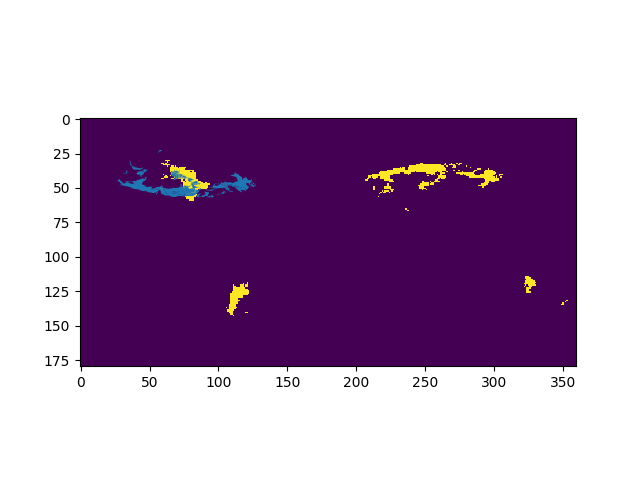

In [5]:
steppes.plot()

In [11]:
raster_1 = get_global_raster(1)
steppes_rasterized = rasterize_shapefile(steppes, raster_1)


<IPython.core.display.Javascript object>


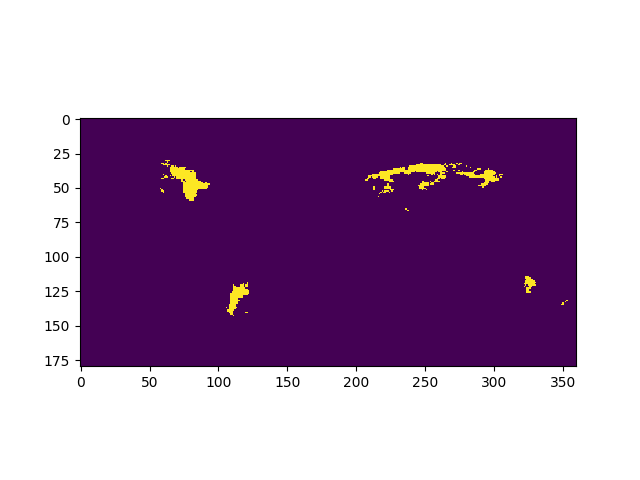

In [13]:
plt.imshow(steppes_rasterized)

In [14]:
mask = np.load("./data/underwater_mask.npy")

In [15]:
steppe_masked = np.ma.array(steppes_rasterized, mask=mask)

<IPython.core.display.Javascript object>


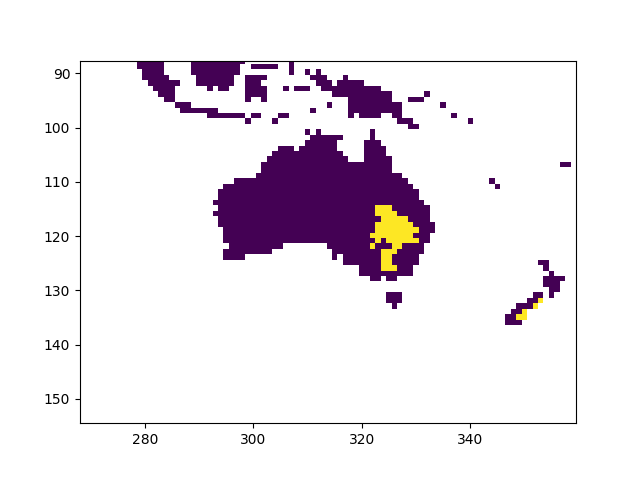

In [16]:
plt.imshow(steppe_masked)